# 이미지란
![](./dog-puppy.png)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# 맥북 한글 폰트 설정
import platform
from matplotlib import font_manager

def setup_korean_font():
    """맥북에서 사용 가능한 한글 폰트를 찾아서 설정"""
    system = platform.system()
    print(f"🖥️ 운영체제: {system}")
    
    if system == 'Darwin':  # macOS
        # 맥북에서 사용 가능한 한글 폰트 목록 (우선순위 순)
        korean_fonts = [
            'AppleSDGothicNeo-Regular',
            'AppleGothic', 
            'Nanum Gothic',
            'NanumGothic',
            'Malgun Gothic',
            'Arial Unicode MS'
        ]
        
        # 시스템에 설치된 폰트 목록 가져오기
        available_fonts = [f.name for f in font_manager.fontManager.ttflist]
        
        # 사용 가능한 한글 폰트 찾기
        selected_font = None
        for font in korean_fonts:
            if font in available_fonts:
                selected_font = font
                break
        
        if selected_font:
            plt.rcParams['font.family'] = selected_font
            print(f"✅ 한글 폰트 설정 완료: {selected_font}")
        else:
            # 대안: 유니코드 지원 폰트 사용
            plt.rcParams['font.family'] = 'Arial Unicode MS'
            print("⚠️ 기본 한글 폰트를 찾을 수 없어 Arial Unicode MS 사용")
            
    else:
        plt.rcParams['font.family'] = 'Malgun Gothic'
        print(f"✅ 한글 폰트 설정: Malgun Gothic")
    
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 마이너스 기호 깨짐 방지 설정 완료")

# 한글 폰트 설정 실행
setup_korean_font()


2025-09-24 18:18:48.763396: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/aaron/Github/Kmong/Aaron/hg-mldl2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


🖥️ 운영체제: Darwin
✅ 한글 폰트 설정 완료: AppleGothic
✅ 마이너스 기호 깨짐 방지 설정 완료


In [5]:
# 이미지 처리를 위한 추가 라이브러리
from PIL import Image
import numpy as np
import cv2

# dog-puppy.png 이미지 로드
image_path = './dog-puppy.png'

# PIL로 이미지 로드
img_pil = Image.open(image_path)
print(f"이미지 크기: {img_pil.size}")
print(f"이미지 모드: {img_pil.mode}")

# numpy 배열로 변환
img_array = np.array(img_pil)
print(f"이미지 배열 형태: {img_array.shape}")

# 이미지가 RGBA인 경우 RGB로 변환
if img_array.shape[2] == 4:  # RGBA
    img_array = img_array[:, :, :3]  # 알파 채널 제거
    print("RGBA 이미지를 RGB로 변환했습니다.")

height, width, channels = img_array.shape
print(f"최종 이미지 크기: {width}x{height}, 채널: {channels}")


이미지 크기: (425, 424)
이미지 모드: RGBA
이미지 배열 형태: (424, 425, 4)
RGBA 이미지를 RGB로 변환했습니다.
최종 이미지 크기: 425x424, 채널: 3


In [13]:
# RGB 채널 분리
red_channel = img_array[:, :, 0]      # R 채널 (빨강)
green_channel = img_array[:, :, 1]    # G 채널 (초록)
blue_channel = img_array[:, :, 2]     # B 채널 (파랑)

print("RGB 채널 분리 완료!")
print(f"빨강 채널 형태: {red_channel.shape}")
print(f"초록 채널 형태: {green_channel.shape}")
print(f"파랑 채널 형태: {blue_channel.shape}")

# 각 채널의 값 범위 확인
print(f"\n빨강 채널 값 범위: {red_channel.min()} ~ {red_channel.max()}")
print(f"초록 채널 값 범위: {green_channel.min()} ~ {green_channel.max()}")
print(f"파랑 채널 값 범위: {blue_channel.min()} ~ {blue_channel.max()}")


RGB 채널 분리 완료!
빨강 채널 형태: (424, 425)
초록 채널 형태: (424, 425)
파랑 채널 형태: (424, 425)

빨강 채널 값 범위: 0 ~ 255
초록 채널 값 범위: 0 ~ 249
파랑 채널 값 범위: 0 ~ 242


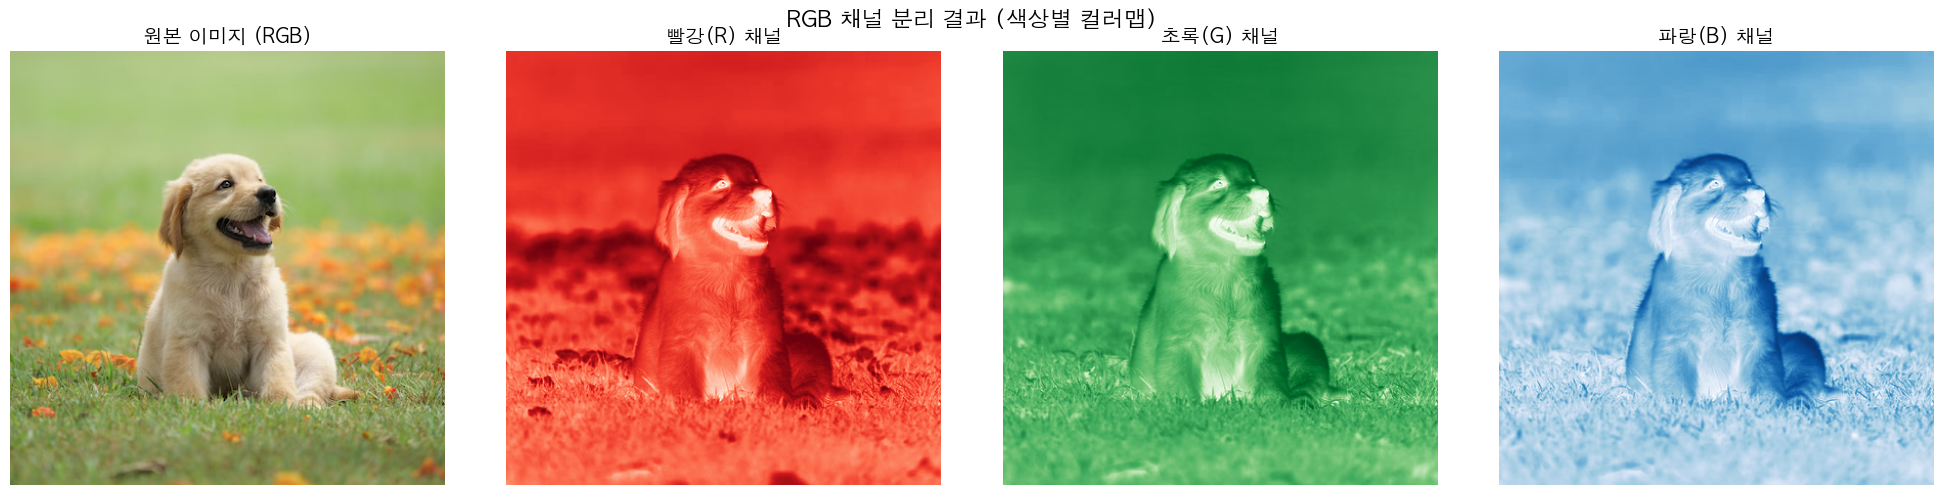

In [14]:
import matplotlib.pyplot as plt

# 원본 이미지와 각 RGB 채널을 시각화
plt.figure(figsize=(20, 5))

# 1. 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(img_array)
plt.title('원본 이미지 (RGB)', fontsize=14, fontweight='bold')
plt.axis('off')

# 2. 빨강 채널 (빨강 컬러맵으로 표시)
plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('빨강(R) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

# 3. 초록 채널 (초록 컬러맵으로 표시)
plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('초록(G) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

# 4. 파랑 채널 (파랑 컬러맵으로 표시)
plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('파랑(B) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

plt.suptitle('RGB 채널 분리 결과 (색상별 컬러맵)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


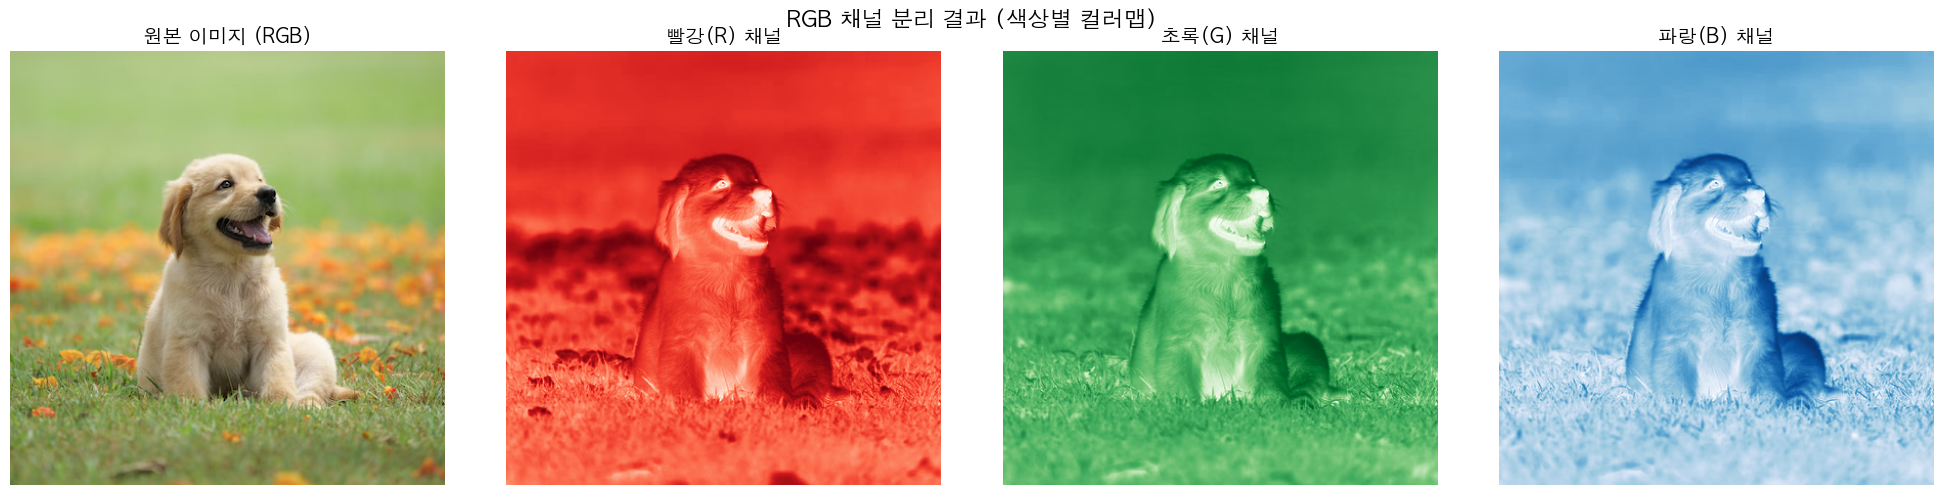

In [15]:
# 각 채널을 해당 색상으로 시각화 (더 직관적)
plt.figure(figsize=(20, 5))

# 1. 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(img_array)
plt.title('원본 이미지 (RGB)', fontsize=14, fontweight='bold')
plt.axis('off')

# 2. 빨강 채널 (빨강 컬러맵으로 표시)
plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('빨강(R) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

# 3. 초록 채널 (초록 컬러맵으로 표시)
plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('초록(G) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

# 4. 파랑 채널 (파랑 컬러맵으로 표시)
plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('파랑(B) 채널', fontsize=14, fontweight='bold')
plt.axis('off')

plt.suptitle('RGB 채널 분리 결과 (색상별 컬러맵)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [17]:
# R 채널 이미지에 픽셀 그리드 표시
plt.figure(figsize=(15, 15))

# R 채널 이미지 표시 (빨간색 컬러맵)
plt.imshow(red_channel, cmap='Reds')
plt.title(f'R 채널 이미지 - 픽셀 그리드 ({width}x{height})', fontsize=16, fontweight='bold')

# 그리드 설정
# 세로선 (x축 방향)
for x in range(0, width + 1, 1):
    plt.axvline(x - 0.5, color='white', linewidth=0.1, alpha=0.7)

# 가로선 (y축 방향)  
for y in range(0, height + 1, 1):
    plt.axhline(y - 0.5, color='white', linewidth=0.1, alpha=0.7)

# 축 설정
plt.xlim(-0.5, width - 0.5)
plt.ylim(height - 0.5, -0.5)  # y축 뒤집기 (이미지 좌표계)

# 축 레이블
plt.xlabel('픽셀 X 좌표', fontsize=12)
plt.ylabel('픽셀 Y 좌표', fontsize=12)

# 틱 설정 (너무 많으면 복잡하므로 적당히)
x_ticks = range(0, width, max(1, width // 20))  # 최대 20개 틱
y_ticks = range(0, height, max(1, height // 20))  # 최대 20개 틱
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()

print(f"✅ R 채널 이미지 ({width}x{height} = {width*height:,}개 픽셀)에 그리드가 표시되었습니다!")


✅ R 채널 이미지 (425x424 = 180,200개 픽셀)에 그리드가 표시되었습니다!


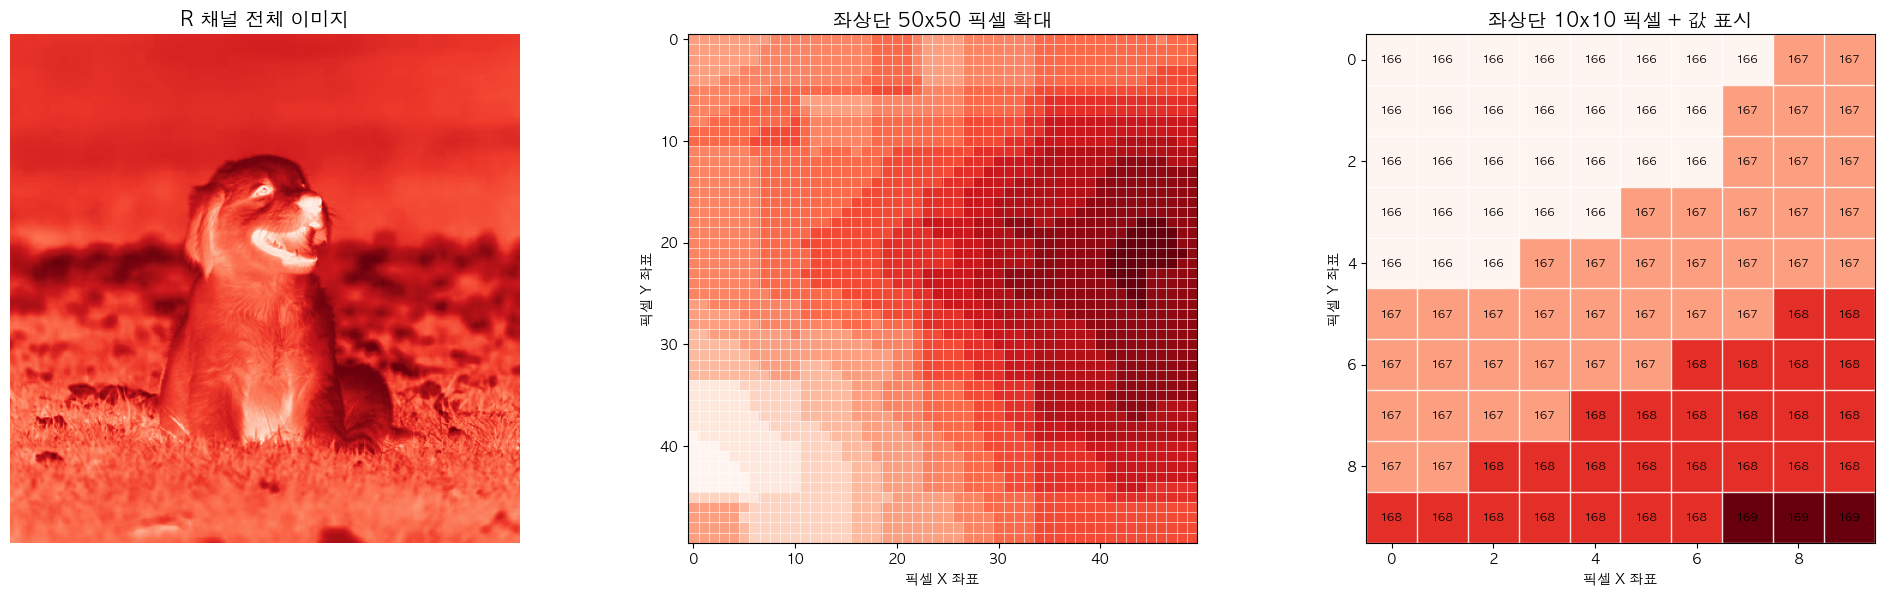

✅ R 채널 이미지의 픽셀 그리드 시각화 완료!
   - 전체 이미지 크기: 425x424 = 180,200개 픽셀
   - 확대 영역 1: 50x50 = 2,500개 픽셀
   - 확대 영역 2: 10x10 = 100개 픽셀 (값 포함)


In [ ]:
해

In [19]:
# 이미지를 벡터로 변환하는 과정 설명 및 시각화
print("🖼️ 이미지를 벡터로 변환하는 과정")
print("=" * 60)

# 1. 원본 이미지 정보
print(f"📊 원본 이미지 정보:")
print(f"   - 크기: {width} x {height} = {width * height:,}개 픽셀")
print(f"   - 채널: {channels}개 (R, G, B)")
print(f"   - 총 픽셀 값: {width * height * channels:,}개")

# 2. 각 채널을 1차원 벡터로 변환
print(f"\n🔄 각 채널을 1차원 벡터로 변환:")

# R 채널을 1차원으로 변환 (행 우선 순서)
r_vector = red_channel.flatten()    # 또는 red_channel.reshape(-1)
g_vector = green_channel.flatten()
b_vector = blue_channel.flatten()

print(f"   - R 채널: {red_channel.shape} → {r_vector.shape} (1차원 벡터)")
print(f"   - G 채널: {green_channel.shape} → {g_vector.shape} (1차원 벡터)")
print(f"   - B 채널: {blue_channel.shape} → {b_vector.shape} (1차원 벡터)")

# 3. RGB 벡터들을 하나로 결합
print(f"\n🔗 RGB 벡터들을 하나로 결합:")
rgb_combined_vector = np.concatenate([r_vector, g_vector, b_vector])
print(f"   - 결합된 벡터 크기: {rgb_combined_vector.shape}")
print(f"   - 총 크기: {len(r_vector)} + {len(g_vector)} + {len(b_vector)} = {len(rgb_combined_vector):,}")

# 4. 변환 과정 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 상단: 원본 채널들
axes[0, 0].imshow(red_channel, cmap='Reds')
axes[0, 0].set_title(f'R 채널\n{red_channel.shape}', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(green_channel, cmap='Greens')
axes[0, 1].set_title(f'G 채널\n{green_channel.shape}', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(blue_channel, cmap='Blues')
axes[0, 2].set_title(f'B 채널\n{blue_channel.shape}', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# 하단: 1차원 벡터들 (처음 1000개 값만 표시)
sample_size = 1000

axes[1, 0].plot(r_vector[:sample_size], color='red', linewidth=0.5)
axes[1, 0].set_title(f'R 벡터 (처음 {sample_size}개)\n크기: {r_vector.shape}', fontsize=12)
axes[1, 0].set_xlabel('인덱스')
axes[1, 0].set_ylabel('픽셀 값')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(g_vector[:sample_size], color='green', linewidth=0.5)
axes[1, 1].set_title(f'G 벡터 (처음 {sample_size}개)\n크기: {g_vector.shape}', fontsize=12)
axes[1, 1].set_xlabel('인덱스')
axes[1, 1].set_ylabel('픽셀 값')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].plot(b_vector[:sample_size], color='blue', linewidth=0.5)
axes[1, 2].set_title(f'B 벡터 (처음 {sample_size}개)\n크기: {b_vector.shape}', fontsize=12)
axes[1, 2].set_xlabel('인덱스')
axes[1, 2].set_ylabel('픽셀 값')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ 이미지 → 벡터 변환 완료!")
print(f"   📏 최종 벡터 크기: {len(rgb_combined_vector):,} = {width}×{height}×{channels}")


🖼️ 이미지를 벡터로 변환하는 과정
📊 원본 이미지 정보:
   - 크기: 425 x 424 = 180,200개 픽셀
   - 채널: 3개 (R, G, B)
   - 총 픽셀 값: 540,600개

🔄 각 채널을 1차원 벡터로 변환:
   - R 채널: (424, 425) → (180200,) (1차원 벡터)
   - G 채널: (424, 425) → (180200,) (1차원 벡터)
   - B 채널: (424, 425) → (180200,) (1차원 벡터)

🔗 RGB 벡터들을 하나로 결합:
   - 결합된 벡터 크기: (540600,)
   - 총 크기: 180200 + 180200 + 180200 = 540,600



✅ 이미지 → 벡터 변환 완료!
   📏 최종 벡터 크기: 540,600 = 425×424×3


In [20]:
# R 채널을 랜덤하게 섞어서 원본 형태를 알아볼 수 없게 만들기
print("🎲 R 채널 랜덤 셔플링")
print("=" * 50)

# 1. 원본 R 채널 벡터 복사
r_vector_original = r_vector.copy()
print(f"📊 원본 R 벡터 정보:")
print(f"   - 크기: {len(r_vector_original):,}개")
print(f"   - 값 범위: {r_vector_original.min()} ~ {r_vector_original.max()}")
print(f"   - 평균: {r_vector_original.mean():.2f}")

# 2. R 벡터를 랜덤하게 섞기
np.random.seed(42)  # 재현 가능한 결과를 위한 시드 설정
r_vector_shuffled = r_vector_original.copy()
np.random.shuffle(r_vector_shuffled)

print(f"\n🔄 셔플링 후 R 벡터 정보:")
print(f"   - 크기: {len(r_vector_shuffled):,}개 (동일)")
print(f"   - 값 범위: {r_vector_shuffled.min()} ~ {r_vector_shuffled.max()} (동일)")
print(f"   - 평균: {r_vector_shuffled.mean():.2f} (동일)")
print(f"   - 순서: 완전히 랜덤하게 섞임!")

# 3. 셔플된 벡터를 다시 2D 이미지로 변환
r_channel_shuffled = r_vector_shuffled.reshape(height, width)

print(f"\n🖼️ 셔플된 R 채널 이미지:")
print(f"   - 원본 형태: {red_channel.shape}")
print(f"   - 셔플 형태: {r_channel_shuffled.shape} (동일)")

# 4. 원본과 셔플된 R 채널 비교 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 상단: 원본들
axes[0, 0].imshow(red_channel, cmap='Reds')
axes[0, 0].set_title('원본 R 채널\n(코, 눈 등 식별 가능)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(r_channel_shuffled, cmap='Reds')
axes[0, 1].set_title('셔플된 R 채널\n(완전히 무작위 패턴)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# 차이 이미지
difference = np.abs(red_channel.astype(float) - r_channel_shuffled.astype(float))
axes[0, 2].imshow(difference, cmap='hot')
axes[0, 2].set_title('차이 이미지\n(밝을수록 큰 차이)', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# 하단: 벡터 비교 (처음 2000개)
sample_size = 2000
x_range = range(sample_size)

axes[1, 0].plot(x_range, r_vector_original[:sample_size], color='red', linewidth=0.8, label='원본')
axes[1, 0].set_title(f'원본 R 벡터 (처음 {sample_size}개)', fontsize=12)
axes[1, 0].set_xlabel('인덱스')
axes[1, 0].set_ylabel('픽셀 값')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

axes[1, 1].plot(x_range, r_vector_shuffled[:sample_size], color='darkred', linewidth=0.8, label='셔플됨')
axes[1, 1].set_title(f'셔플된 R 벡터 (처음 {sample_size}개)', fontsize=12)
axes[1, 1].set_xlabel('인덱스')
axes[1, 1].set_ylabel('픽셀 값')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

# 히스토그램 비교
axes[1, 2].hist(r_vector_original, bins=50, alpha=0.7, color='red', label='원본', density=True)
axes[1, 2].hist(r_vector_shuffled, bins=50, alpha=0.7, color='darkred', label='셔플됨', density=True)
axes[1, 2].set_title('픽셀 값 분포 비교', fontsize=12)
axes[1, 2].set_xlabel('픽셀 값')
axes[1, 2].set_ylabel('밀도')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ R 채널 랜덤 셔플링 완료!")
print(f"   🎯 결과: 원본에서 코, 눈 등의 특징이 완전히 사라짐")
print(f"   📊 통계: 픽셀 값 분포는 동일하지만 공간적 구조 파괴")
print(f"   🔀 용도: 데이터 증강, 프라이버시 보호, 노이즈 생성 등")


🎲 R 채널 랜덤 셔플링
📊 원본 R 벡터 정보:
   - 크기: 180,200개
   - 값 범위: 0 ~ 255
   - 평균: 161.93

🔄 셔플링 후 R 벡터 정보:
   - 크기: 180,200개 (동일)
   - 값 범위: 0 ~ 255 (동일)
   - 평균: 161.93 (동일)
   - 순서: 완전히 랜덤하게 섞임!

🖼️ 셔플된 R 채널 이미지:
   - 원본 형태: (424, 425)
   - 셔플 형태: (424, 425) (동일)



✅ R 채널 랜덤 셔플링 완료!
   🎯 결과: 원본에서 코, 눈 등의 특징이 완전히 사라짐
   📊 통계: 픽셀 값 분포는 동일하지만 공간적 구조 파괴
   🔀 용도: 데이터 증강, 프라이버시 보호, 노이즈 생성 등


In [21]:
# 전체 과정 요약
print("📋 이미지 처리 과정 요약")
print("=" * 60)

print("1️⃣ 이미지를 R/G/B 3개의 채널로 분리")
print(f"   ✅ 원본 이미지: {width}×{height}×{channels}")
print(f"   ✅ R 채널: {red_channel.shape}")
print(f"   ✅ G 채널: {green_channel.shape}")
print(f"   ✅ B 채널: {blue_channel.shape}")

print(f"\n2️⃣ 각 채널을 동일한 크기의 숫자 행렬로 표현")
print(f"   ✅ 각 채널은 {width}×{height} = {width*height:,}개의 픽셀 값")
print(f"   ✅ 값 범위: 0~255 (8비트 정수)")

print(f"\n3️⃣ 각 R/G/B 채널을 1차원 벡터로 변환")
print(f"   ✅ R 채널: {red_channel.shape} → {r_vector.shape}")
print(f"   ✅ G 채널: {green_channel.shape} → {g_vector.shape}")
print(f"   ✅ B 채널: {blue_channel.shape} → {b_vector.shape}")
print(f"   📝 방법: [1행, 2행, 3행, ..., {height}행]을 순서대로 연결")

print(f"\n4️⃣ 각 R/G/B의 1차원 벡터를 이어 붙이기")
print(f"   ✅ R벡터 + G벡터 + B벡터 = 최종 벡터")
print(f"   ✅ 크기: {len(r_vector):,} + {len(g_vector):,} + {len(b_vector):,} = {len(rgb_combined_vector):,}")
print(f"   ✅ 최종: {len(rgb_combined_vector):,} = {width*height*channels:,} (검증 완료)")

print(f"\n5️⃣ R 채널 랜덤 셔플링 결과")
print(f"   ✅ 원본: 코, 눈 등 식별 가능한 구조적 패턴")
print(f"   ✅ 셔플 후: 완전히 무작위 노이즈 패턴")
print(f"   ✅ 픽셀 값 분포: 동일 (평균, 분산 보존)")
print(f"   ✅ 공간적 구조: 완전히 파괴됨")

print(f"\n🎯 핵심 포인트:")
print(f"   • 이미지 = 숫자들의 3차원 배열")
print(f"   • 벡터화 = 3D → 1D 변환 (정보 손실 없음)")
print(f"   • 셔플링 = 공간적 관계 파괴 (픽셀 값은 보존)")
print(f"   • CNN의 목표 = 이런 공간적 패턴을 학습하는 것!")

# 최종 크기 검증
total_pixels = width * height * channels
vector_size = len(rgb_combined_vector)
print(f"\n🔍 최종 검증:")
print(f"   계산된 총 픽셀 수: {total_pixels:,}")
print(f"   실제 벡터 크기: {vector_size:,}")
print(f"   검증 결과: {'✅ 일치!' if total_pixels == vector_size else '❌ 불일치!'}")


📋 이미지 처리 과정 요약
1️⃣ 이미지를 R/G/B 3개의 채널로 분리
   ✅ 원본 이미지: 425×424×3
   ✅ R 채널: (424, 425)
   ✅ G 채널: (424, 425)
   ✅ B 채널: (424, 425)

2️⃣ 각 채널을 동일한 크기의 숫자 행렬로 표현
   ✅ 각 채널은 425×424 = 180,200개의 픽셀 값
   ✅ 값 범위: 0~255 (8비트 정수)

3️⃣ 각 R/G/B 채널을 1차원 벡터로 변환
   ✅ R 채널: (424, 425) → (180200,)
   ✅ G 채널: (424, 425) → (180200,)
   ✅ B 채널: (424, 425) → (180200,)
   📝 방법: [1행, 2행, 3행, ..., 424행]을 순서대로 연결

4️⃣ 각 R/G/B의 1차원 벡터를 이어 붙이기
   ✅ R벡터 + G벡터 + B벡터 = 최종 벡터
   ✅ 크기: 180,200 + 180,200 + 180,200 = 540,600
   ✅ 최종: 540,600 = 540,600 (검증 완료)

5️⃣ R 채널 랜덤 셔플링 결과
   ✅ 원본: 코, 눈 등 식별 가능한 구조적 패턴
   ✅ 셔플 후: 완전히 무작위 노이즈 패턴
   ✅ 픽셀 값 분포: 동일 (평균, 분산 보존)
   ✅ 공간적 구조: 완전히 파괴됨

🎯 핵심 포인트:
   • 이미지 = 숫자들의 3차원 배열
   • 벡터화 = 3D → 1D 변환 (정보 손실 없음)
   • 셔플링 = 공간적 관계 파괴 (픽셀 값은 보존)
   • CNN의 목표 = 이런 공간적 패턴을 학습하는 것!

🔍 최종 검증:
   계산된 총 픽셀 수: 540,600
   실제 벡터 크기: 540,600
   검증 결과: ✅ 일치!


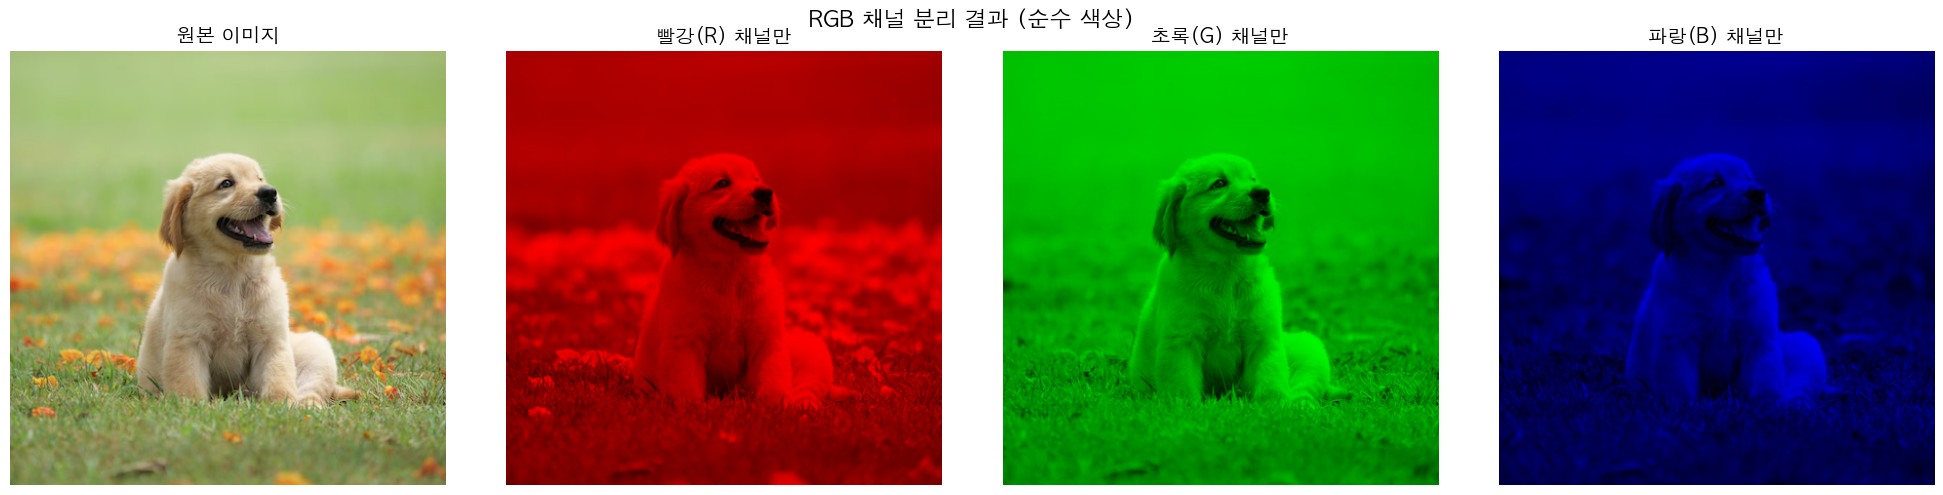

In [22]:
# 각 채널을 순수한 RGB 색상으로 재구성하여 시각화
plt.figure(figsize=(20, 5))

# 빈 배열 생성 (검정 배경)
zeros = np.zeros_like(red_channel)

# 각 채널만 활성화된 RGB 이미지 생성
red_only = np.stack([red_channel, zeros, zeros], axis=2)       # 빨강만
green_only = np.stack([zeros, green_channel, zeros], axis=2)   # 초록만  
blue_only = np.stack([zeros, zeros, blue_channel], axis=2)     # 파랑만

# 1. 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(img_array)
plt.title('원본 이미지', fontsize=14, fontweight='bold')
plt.axis('off')

# 2. 빨강 채널만 활성화
plt.subplot(1, 4, 2)
plt.imshow(red_only)
plt.title('빨강(R) 채널만', fontsize=14, fontweight='bold')
plt.axis('off')

# 3. 초록 채널만 활성화
plt.subplot(1, 4, 3)
plt.imshow(green_only)
plt.title('초록(G) 채널만', fontsize=14, fontweight='bold')
plt.axis('off')

# 4. 파랑 채널만 활성화
plt.subplot(1, 4, 4)
plt.imshow(blue_only)
plt.title('파랑(B) 채널만', fontsize=14, fontweight='bold')
plt.axis('off')

plt.suptitle('RGB 채널 분리 결과 (순수 색상)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
